In [1]:
%config IPCompleter.greedy = True

## Reading txt Files

### Step by step 

##### Open File 

In [2]:
filename = 'data/example_read.txt'
fobj = open(filename)

##### Read content as str

In [3]:
content = fobj.read()
print(content)

      _    _
   ,-(|)--(|)-.
   \_   ..   _/
     \______/
       V  V                                  ____
       `.^^`.                               /^,--`
         \^^^\                             (^^\
         |^^^|                  _,-._       \^^\
        (^^^^\      __      _,-'^^^^^`.    _,'^^)
         \^^^^`._,-'^^`-._.'^^^^__^^^^ `--'^^^_/
          \^^^^^ ^^^_^^^^^^^_,-'  `.^^^^^^^^_/
           `.____,-' `-.__.'        `-.___.'



Reading again will not show any content, because the current position is at the end of the file

In [4]:
content = fobj.read()
print(content)

So we have to seek it back to the start

In [5]:
fobj.seek(0)

content = fobj.read()
print(content)

      _    _
   ,-(|)--(|)-.
   \_   ..   _/
     \______/
       V  V                                  ____
       `.^^`.                               /^,--`
         \^^^\                             (^^\
         |^^^|                  _,-._       \^^\
        (^^^^\      __      _,-'^^^^^`.    _,'^^)
         \^^^^`._,-'^^`-._.'^^^^__^^^^ `--'^^^_/
          \^^^^^ ^^^_^^^^^^^_,-'  `.^^^^^^^^_/
           `.____,-' `-.__.'        `-.___.'



##### Close the file

In [6]:
fobj.close()

### With statement

Always use the with statement. Closes the file at the end and in the case of an exeption.

In [7]:
filename = 'data/example_read.txt'

with open(filename) as fobj:
    content = fobj.read()

print(content)

      _    _
   ,-(|)--(|)-.
   \_   ..   _/
     \______/
       V  V                                  ____
       `.^^`.                               /^,--`
         \^^^\                             (^^\
         |^^^|                  _,-._       \^^\
        (^^^^\      __      _,-'^^^^^`.    _,'^^)
         \^^^^`._,-'^^`-._.'^^^^__^^^^ `--'^^^_/
          \^^^^^ ^^^_^^^^^^^_,-'  `.^^^^^^^^_/
           `.____,-' `-.__.'        `-.___.'



## Writing txt Files

The default mode is read only 'r', we have to enable the writing mode 'w'.

In [8]:
with open('data/example_write.txt', mode='w') as fobj:
    fobj.write('\t\tPython in the Lab\n')
    fobj.write(content)

Quick check

In [9]:
with open('data/example_write.txt') as fobj:
    print(fobj.read())

		Python in the Lab
      _    _
   ,-(|)--(|)-.
   \_   ..   _/
     \______/
       V  V                                  ____
       `.^^`.                               /^,--`
         \^^^\                             (^^\
         |^^^|                  _,-._       \^^\
        (^^^^\      __      _,-'^^^^^`.    _,'^^)
         \^^^^`._,-'^^`-._.'^^^^__^^^^ `--'^^^_/
          \^^^^^ ^^^_^^^^^^^_,-'  `.^^^^^^^^_/
           `.____,-' `-.__.'        `-.___.'



##  Reading line by line

In [10]:
with open('data/example_write.txt') as fobj:
    
    print(fobj.readline(), end='')
    print(fobj.readline(), end='')
    print(fobj.readline(), end='')
    print(fobj.readline(), end='')
    print(fobj.readline(), end='')
    print(fobj.readline(), end='')
    print(fobj.readline(), end='')
    print(fobj.readline(), end='')
    print(fobj.readline(), end='')
    print(fobj.readline(), end='')
    print(fobj.readline(), end='')
    print(fobj.readline(), end='')
    print(fobj.readline(), end='')

		Python in the Lab
      _    _
   ,-(|)--(|)-.
   \_   ..   _/
     \______/
       V  V                                  ____
       `.^^`.                               /^,--`
         \^^^\                             (^^\
         |^^^|                  _,-._       \^^\
        (^^^^\      __      _,-'^^^^^`.    _,'^^)
         \^^^^`._,-'^^`-._.'^^^^__^^^^ `--'^^^_/
          \^^^^^ ^^^_^^^^^^^_,-'  `.^^^^^^^^_/
           `.____,-' `-.__.'        `-.___.'


##### !!! There must be a better way !!!! 

In [11]:
with open('data/example_write.txt') as fobj:
    for line in fobj:
        print(line, end='')

		Python in the Lab
      _    _
   ,-(|)--(|)-.
   \_   ..   _/
     \______/
       V  V                                  ____
       `.^^`.                               /^,--`
         \^^^\                             (^^\
         |^^^|                  _,-._       \^^\
        (^^^^\      __      _,-'^^^^^`.    _,'^^)
         \^^^^`._,-'^^`-._.'^^^^__^^^^ `--'^^^_/
          \^^^^^ ^^^_^^^^^^^_,-'  `.^^^^^^^^_/
           `.____,-' `-.__.'        `-.___.'


Or read all lines into a python list first

In [12]:
with open('data/example_write.txt') as fobj:
    lines = fobj.readlines()
    
for line in reversed(lines):
    print(line, end='')

           `.____,-' `-.__.'        `-.___.'
          \^^^^^ ^^^_^^^^^^^_,-'  `.^^^^^^^^_/
         \^^^^`._,-'^^`-._.'^^^^__^^^^ `--'^^^_/
        (^^^^\      __      _,-'^^^^^`.    _,'^^)
         |^^^|                  _,-._       \^^\
         \^^^\                             (^^\
       `.^^`.                               /^,--`
       V  V                                  ____
     \______/
   \_   ..   _/
   ,-(|)--(|)-.
      _    _
		Python in the Lab


This for example would  allow is to slice it later

In [13]:
for line in lines[2:6]:
    print(line, end='')

   ,-(|)--(|)-.
   \_   ..   _/
     \______/
       V  V                                  ____


### Writing data to file

For practice we will only use modules of the Python standart libary in this example. Later we make everything easier with numpy.

In [14]:
import math    # Python math module
import random  # Python random module

Define noisy sin und cos function

In [15]:
def noisy_sin(phi, amp=1, noise_amp=0.25):
    return amp * math.sin(phi) + noise_amp * random.random()

def noisy_cos(phi, amp=1, noise_amp=0.25):
    return amp * math.cos(phi) + noise_amp * random.random()

Use list comprehension to create data lists

In [16]:
phi_data = [4 * math.pi  *(x / 500) for x in range(0, 250)]

sin_data = [noisy_sin(phi, noise_amp=0.4) for phi in phi_data]
cos_data = [noisy_cos(phi, amp=1.5, noise_amp=0.2) for phi in phi_data]

Plot everything

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

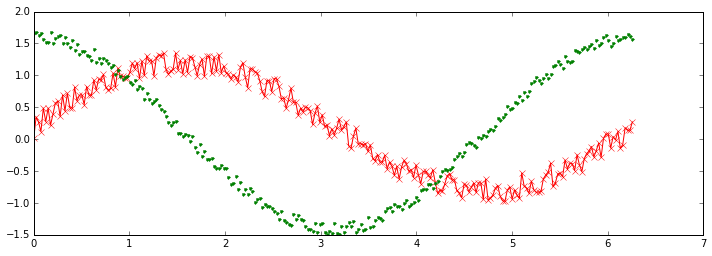

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(phi_data, sin_data, color='red', marker='x')
plt.plot(phi_data, cos_data, 'g.')

Let's write some data to file

In [19]:
with open('data/data_write.txt', 'w') as fobj:
    
    for datapoint in sin_data:
        fobj.write('{:.3f}\n'.format(datapoint))

How do we write all three data next to each other?

In [20]:
with open('data/data_write.txt', 'w') as fobj:
    
    for i in range(len(phi_data)):
        fstr = '{:.3f}; {:.3f}; {:.3f} \n'
        fobj.write(fstr.format(phi_data[i], sin_data[i], cos_data[i]))        

When ever you use indices in Python you are doing something WRONG or you EXACTLY know why.

#### !!! There must be a better way !!!! 

Just zip it

In [21]:
with open('data/data_write.txt', 'w') as fobj:
    
    for phi, sin, cos in zip(phi_data, sin_data, cos_data):
        fstr = '{:.3f}; {:.3f}; {:.3f} \n'
        fobj.write(fstr.format(phi, sin, cos)) 

A few word on zip

In [22]:
l0 = [1, 2, 3]
l1 = ['a', 'b', 'c']
l2 = ['#', '*', '%']

In [23]:
for item in zip(l0, l1 ,l2):
    print(item)

(1, 'a', '#')
(2, 'b', '*')
(3, 'c', '%')


There are more little helper products product(), chain(), cycle(), repeat(), ......  in [iterttools](https://docs.python.org/3.5/library/itertools.html)

Now let us add some head data

In [24]:
import datetime

In [25]:
with open('data/data_write.txt', 'w') as fobj:
    
    # Write header
    fobj.write('#Python in the Lab\n')
    fobj.write('#\n')
    fobj.write('#{} \n'.format(datetime.datetime.now()))
    fobj.write('#\n')
    fobj.write('#Writing some noisy sin and cos data to a file.\n')
    fobj.write('\n')
    
    fobj.write('\n')
    fobj.write('phi (2pi); sin (a.u.); cos (a.u.)\n')
    
    # Write data
    for phi, sin, cos in zip(phi_data, sin_data, cos_data):
        fstr = '{:.3f}; {:.3f}; {:.3f} \n'
        fobj.write(fstr.format(phi, sin, cos)) 

Some words on datetime objects

In [26]:
now = datetime.datetime.now()
now

datetime.datetime(2015, 11, 30, 15, 25, 53, 75029)

In [27]:
print(now)

2015-11-30 15:25:53.075029


In [28]:
print('Year:', datetime.datetime.now().year)
print('Month:', datetime.datetime.now().month)
print('Day:', datetime.datetime.now().day)
print('Hour:', datetime.datetime.now().hour)
print('Minute:', datetime.datetime.now().minute)
print('Second:', datetime.datetime.now().second)
print('Microsecond: ',datetime.datetime.now().microsecond)

Year: 2015
Month: 11
Day: 30
Hour: 15
Minute: 25
Second: 53
Microsecond:  308962


Feel free to format the date as you like. For a complete list of formatting directives, see [strftime() and strptime()](https://docs.python.org/3.5/library/datetime.html#strftime-strptime-behavior) Behavior.

In [29]:
print('{:%a %H:%M %d.%m.%Y}'.format(now))
print('{:%A %H:%M %d %B %Y %z}'.format(now))
print('{:%A %I %P:%M %d.%b.%y}'.format(now))
print('The day is {0:%d}, the month is {0:%B}.'.format(now))

Mon 15:25 30.11.2015
Monday 15:25 30 November 2015 
Monday 03 pm:25 30.Nov.15
The day is 30, the month is November.


###  Reading data from file

In [30]:
# Read data in lines from file
with open('data/data_write.txt') as fobj:
    lines = fobj.readlines()    
    
# Organize everythin nicly in a dict
data = {}
data['title'] = lines[0].strip('#').strip().rstrip()
data['time'] = lines[2].strip('#').strip().rstrip()
data['comment'] = lines[4].strip('#').strip().rstrip()
data['phi'] = []
data['sin'] = []
data['cos'] = []

for dataline in lines[8:]:
    
    # Remove linebreaks '\n' and split the line
    phi, sin, cos = dataline.strip().split(';')
    
    data['phi'].append(float(phi))
    data['sin'].append(float(sin))
    data['cos'].append(float(cos))

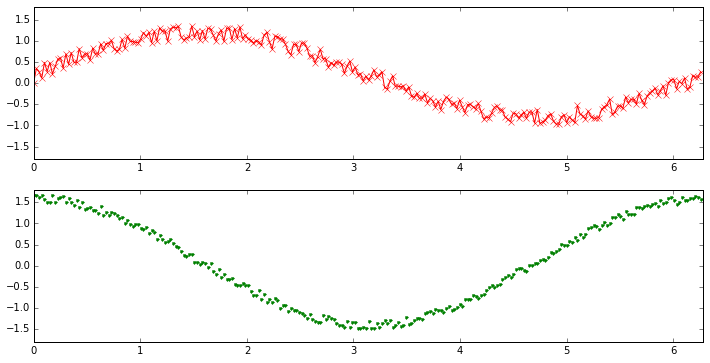

In [31]:
fig, axs = plt.subplots(2, 1, figsize=(12, 6))
axs[0].plot(data['phi'], data['sin'], color='red', marker='x')
axs[1].plot(data['phi'], data['cos'], 'g.')

for ax in axs:
    ax.set_xlim(0, 2 * math.pi)
    ax.set_ylim(-1.8, 1.8)

###  How NumPy script kiddies would do it

In [32]:
import numpy as np

In [33]:
data = {}
data['phi'], data['sin'], data['cos'] = np.genfromtxt('data/data_write.txt', skip_header=8, delimiter=';').T

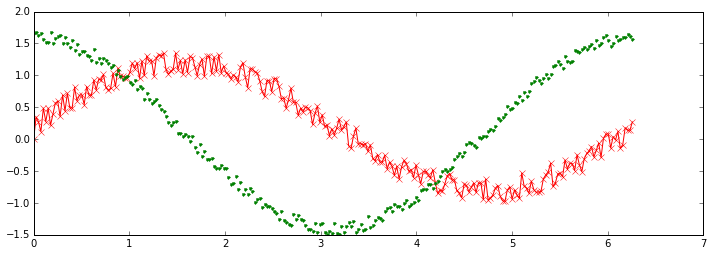

In [34]:
plt.figure(figsize=(12, 4))
plt.plot(data['phi'], data['sin'], color='red', marker='x')
plt.plot(data['phi'], data['cos'], 'g.')

Or more advanced use a custom  dtype

In [35]:
dt = np.dtype([('phi', 'f8'), ('sin', 'f8'), ('cos', 'f8')])
data = np.genfromtxt('data/data_write.txt', dtype=dt, skip_header=8, delimiter=';').T

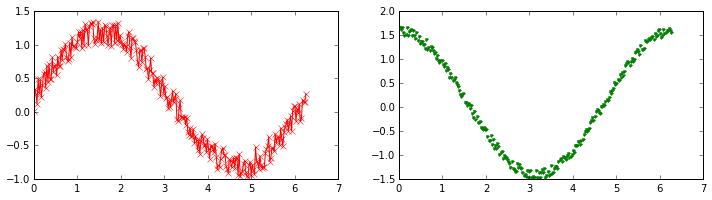

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].plot(data['phi'], data['sin'], color='red', marker='x')
axs[1].plot(data['phi'], data['cos'], 'g.')